In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


# Читатели

In [2]:
readers = pd.read_excel('Читатели.xlsx')
print(readers.shape)
readers.head()

(562133, 2)


,ID читателя,Дата рождения
0,366670,1974-10-14 00:00:00
1,235264,1978-06-01 00:00:00
2,133225,1976-01-06 00:00:00
3,556716,1989-01-28 00:00:00
4,52086,1955-08-14 00:00:00


In [3]:
readers = readers.rename(columns={'Дата рождения': 'birth_day',
                        'ID читателя': 'reader_id'})

In [ ]:
readers

In [4]:
readers['birth_day']

0         1974-10-14 00:00:00
1         1978-06-01 00:00:00
2         1976-01-06 00:00:00
3         1989-01-28 00:00:00
4         1955-08-14 00:00:00
                 ...         
562128    1981-03-08 00:00:00
562129    2009-07-07 00:00:00
562130    2005-07-28 00:00:00
562131    2011-11-12 00:00:00
562132    1982-11-26 00:00:00
Name: birth_day, Length: 562133, dtype: object

In [5]:
def to_datetime(x):
    try:
        return pd.to_datetime(str(x).strip(), format='%Y-%m-%d %H:%M:%S')
    except:
        try:
            return pd.to_datetime(str(x).strip(), format='%Y-%m-%d')
        except:
            return pd.to_datetime('2005-06-23 00:00:00', format='%Y-%m-%d')

In [6]:
readers['birth_day'] = readers['birth_day'].parallel_apply(lambda x: to_datetime(x))

In [38]:
today = pd.to_datetime('2020-10-31 00:00:00', format='%Y-%m-%d %H:%M:%S')

readers['age'] = readers['birth_day'].parallel_apply(lambda x: today - x)
readers['age'] = readers['age'].astype(int) / 10**9 / 60 / 60 / 24 / 365

In [137]:
readers = readers.drop_duplicates().reset_index(drop=True)
readers

,reader_id,birth_day,age
0,366670,1974-10-14,46.079452
1,235264,1978-06-01,42.446575
2,133225,1976-01-06,44.849315
3,556716,1989-01-28,31.778082
4,52086,1955-08-14,65.260274
...,...,...,...
562128,554754,1981-03-08,39.676712
562129,405813,2009-07-07,11.326027
562130,534901,2005-07-28,15.271233
562131,50142,2011-11-12,8.975342


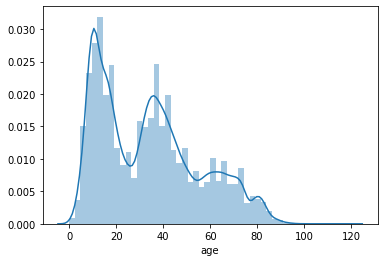

In [138]:
sns.distplot(readers['age'].astype(int))

In [139]:
readers.head()

,reader_id,birth_day,age
0,366670,1974-10-14,46.079452
1,235264,1978-06-01,42.446575
2,133225,1976-01-06,44.849315
3,556716,1989-01-28,31.778082
4,52086,1955-08-14,65.260274


In [140]:
readers.to_csv('readers.csv', index=False)

# Каталог

In [85]:
catalog = pd.ExcelFile('Каталог.xlsx')
catalog = pd.concat([catalog.parse(sheet) for sheet in catalog.sheet_names]).reset_index(drop=True)
print(catalog.shape)
catalog.head()

(1370881, 10)


,doc_id,p100a,p245a,p260a,p260b,p260c,p490a,p650a,p084a,p521a
0,1,Устинова Татьяна Витальевна,Призрак Канта,Москва,Эксмо,2018,Татьяна Устинова. Первая среди лучших,Художественная литература ; Российский детектив,84(2Рос)6,16+
1,2,NaN,Наука и жизнь,Москва,АНО Редакция журнала «Наука и жизнь»,1938-,NaN,Наука. Науковедение,72,12+
2,3,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
3,4,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
4,5,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+


In [86]:
catalog.rename(columns={'p100a': 'author',
                        'p245a': 'title',
                        'p260a': 'city',
                        'p260b': 'publisher',
                        'p260c': 'year',
                        'p490a': 'series',
                        'p650a': 'tags',
                        'p084a': 'article',
                        'p521a': 'age_rating'}, inplace=True)
catalog = catalog.drop_duplicates().reset_index(drop=True)
catalog

,doc_id,author,title,city,publisher,year,series,tags,article,age_rating
0,1,Устинова Татьяна Витальевна,Призрак Канта,Москва,Эксмо,2018,Татьяна Устинова. Первая среди лучших,Художественная литература ; Российский детектив,84(2Рос)6,16+
1,2,NaN,Наука и жизнь,Москва,АНО Редакция журнала «Наука и жизнь»,1938-,NaN,Наука. Науковедение,72,12+
2,3,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
3,4,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
4,5,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
...,...,...,...,...,...,...,...,...,...,...
1370876,1783623,NaN,Золотой век русской поэзии [Текст],Москва,Олма Медиа Групп,2012,Классика в иллюстрациях,Художественная литература,84,NaN
1370877,1783624,NaN,Антология русского лиризма. XX век,Москва,Студия,2004-,NaN,Художественная литература ; Российская поэзия,84(2Рос=Рус)6,NaN
1370878,1783625,Кэрролл Льюис,Приключения Алисы,Москва,Эксмо,2014,NaN,Художественная литература ; Литература для дет...,84(4Вел),12+
1370879,1783626,Барб-Галль Франсуаза,"Шедевры мировой живописи. Как отличать, смотре...",Москва,Эксмо,2018,NaN,Живопись ; Искусство. Искусствоведение ; Истор...,85.14,12+


In [131]:
catalog = catalog.drop_duplicates().reset_index(drop=True)
catalog

,doc_id,author,title,city,publisher,year,series,tags,article,age_rating
0,1,Устинова Татьяна Витальевна,Призрак Канта,Москва,Эксмо,2018,Татьяна Устинова. Первая среди лучших,Художественная литература ; Российский детектив,84(2Рос)6,16+
1,2,NaN,Наука и жизнь,Москва,АНО Редакция журнала «Наука и жизнь»,1938-,NaN,Наука. Науковедение,72,12+
2,3,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
3,4,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
4,5,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
...,...,...,...,...,...,...,...,...,...,...
1370452,1783623,NaN,Золотой век русской поэзии [Текст],Москва,Олма Медиа Групп,2012,Классика в иллюстрациях,Художественная литература,84,NaN
1370453,1783624,NaN,Антология русского лиризма. XX век,Москва,Студия,2004-,NaN,Художественная литература ; Российская поэзия,84(2Рос=Рус)6,NaN
1370454,1783625,Кэрролл Льюис,Приключения Алисы,Москва,Эксмо,2014,NaN,Художественная литература ; Литература для дет...,84(4Вел),12+
1370455,1783626,Барб-Галль Франсуаза,"Шедевры мировой живописи. Как отличать, смотре...",Москва,Эксмо,2018,NaN,Живопись ; Искусство. Искусствоведение ; Истор...,85.14,12+


In [132]:
catalog.dtypes

doc_id         int64
author        object
title         object
city          object
publisher     object
year          object
series        object
tags          object
article       object
age_rating    object
dtype: object

In [133]:
catalog.isna().mean()

doc_id        0.000000
author        0.318928
title         0.012937
city          0.051253
publisher     0.071648
year          0.010198
series        0.697978
tags          0.058720
article       0.053979
age_rating    0.923025
dtype: float64

In [134]:
catalog['age_rating'].value_counts()

16+          34024
0+           27558
12+          22612
6+           16432
18+           4854
16+ ; 18+        5
6+ ; 12+         2
0+ ; 6+          2
16+ ; 12+        1
6+ ; 0+          1
Name: age_rating, dtype: int64

In [135]:
catalog['year'].value_counts()

2007           45206
2008           43426
2006           41941
2005           41103
2004           40207
               ...  
 2007              1
1937г.             1
2012-2016          1
1962 ; 2008        1
1857-1879          1
Name: year, Length: 1770, dtype: int64

In [148]:
catalog.head()

,doc_id,author,title,city,publisher,year,series,tags,article,age_rating
0,1,Устинова Татьяна Витальевна,Призрак Канта,Москва,Эксмо,2018,Татьяна Устинова. Первая среди лучших,Художественная литература ; Российский детектив,84(2Рос)6,16+
1,2,NaN,Наука и жизнь,Москва,АНО Редакция журнала «Наука и жизнь»,1938-,NaN,Наука. Науковедение,72,12+
2,3,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
3,4,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+
4,5,NaN,Наука и жизнь,NaN,NaN,2018,NaN,Наука. Науковедение,72,12+


In [149]:
catalog.to_csv('catalog.csv', index=False)

# Экземпляры

In [78]:
samples_1 = pd.ExcelFile('Экземпляры.xlsx')
samples_1 = pd.concat([samples_1.parse(sheet) for sheet in samples_1.sheet_names]).reset_index(drop=True)
print(samples_1.shape)
samples_1.head()

(6021078, 6)


,Идентификатор экземпляра,ИД Каталожной записи,Инвентарный номер,Штрих-код,Раздел знаний,Идентификатор сиглы
0,12488544,1,09:0000120386,980007854120,84(2Рос=Рус)6,314.0
1,12488546,1,09:0000152427,980010247056,84(2Рос=Рус)6,320.0
2,12488542,1,09:0000240622,980000737154,84(2Рос=Рус)6,306.0
3,13671389,1,09:0000278133,980005475303,84(2Рос=Рус)6,308.0
4,7625486,1,05:0000257728,580001931461,84(2Рос=Рус)6,293.0


In [81]:
samples_2 = pd.ExcelFile('Экземпляры_2.xlsx')
samples_2 = pd.concat([samples_2.parse(sheet) for sheet in samples_2.sheet_names]).reset_index(drop=True)
print(samples_2.shape)
samples_2.head()

(6707802, 6)


,Идентификатор экземпляра,ИД Каталожной записи,Инвентарный номер,Штрих-код,Раздел знаний,Идентификатор сиглы
0,2830404,399001,01:0000019698,181000142300,84(4Шва),112.0
1,2830403,399001,01:0000027988,181000441335,84(4Швейц),113.0
2,2781735,399001,02:0000583817,280005456044,84(4Шва),81.0
3,2781737,399001,02:0000855574,280011962379,84(4Швейц),87.0
4,2781738,399001,02:0000462824,280008297767,84(4Шва),87.0


In [144]:
samples = pd.concat([samples_1, samples_2]).reset_index(drop=True)
samples.rename(columns={'Идентификатор экземпляра': 'book_id',
                        'ИД Каталожной записи': 'doc_id',
                        'Инвентарный номер': 'inventory_id',
                        'Штрих-код': 'barcode',
                        'Раздел знаний': 'classification_id',
                        'Идентификатор сиглы': 'singles_id'}, inplace=True)
samples = samples.drop_duplicates().reset_index(drop=True)
samples

,book_id,doc_id,inventory_id,barcode,classification_id,singles_id
0,12488544,1,09:0000120386,980007854120,84(2Рос=Рус)6,314.0
1,12488546,1,09:0000152427,980010247056,84(2Рос=Рус)6,320.0
2,12488542,1,09:0000240622,980000737154,84(2Рос=Рус)6,306.0
3,13671389,1,09:0000278133,980005475303,84(2Рос=Рус)6,308.0
4,7625486,1,05:0000257728,580001931461,84(2Рос=Рус)6,293.0
...,...,...,...,...,...,...
12724367,15766818,1783620,09:0000894101,980012197601,84(4Бел),326.0
12724368,15766824,1783621,09:0000894102,980012197618,84(5Кит),326.0
12724369,15766840,1783622,09:0000894107,980012197649,84(4Гем),326.0
12724370,15766897,1783625,06:0001132669,600011326696,84(4Вел),423.0


In [145]:
len(set(samples['doc_id']) - set(catalog['doc_id']))

92

In [146]:
len(set(catalog['doc_id']) - set(samples['doc_id']))

43721

In [147]:
samples.to_csv('samples.csv', index=False)

# Выдача

In [96]:
issues_1 = pd.ExcelFile('Выдача_1.xlsx')
issues_1 = pd.concat([issues_1.parse(sheet) for sheet in issues_1.sheet_names]).reset_index(drop=True)
print(issues_1.shape)
issues_1.head()

(5998355, 10)


,ИД выдачи,ИД читателя,Инвентарный номер,Штрих-код,Дата выдачи,Дата сдачи (предполагаемая),Состояние,Unnamed: 7,Состояния,Unnamed: 9
0,1,179,03:0000005767,381000177719,2018-04-13 15:00:00,2018-04-13 15:00:00,6545,NaN,6544.0,На руках
1,2,179,03:0000005761,381000196420,2018-04-13 15:00:00,2018-04-16 15:00:00,6548,NaN,6545.0,Переоформлен
2,3,179,03:0000005767,381000177719,2018-04-13 15:00:00,2018-04-13 15:00:00,6545,NaN,6548.0,Размещен в фонде
3,4,179,03:0000005767,381000177719,2018-04-13 15:00:00,2018-04-13 15:00:00,6545,NaN,NaN,NaN
4,5,179,03:0000005767,381000177719,2018-04-13 15:00:00,2018-04-13 15:00:00,6548,NaN,NaN,NaN


In [97]:
issues_2 = pd.ExcelFile('Выдача_2.xlsx')
issues_2 = pd.concat([issues_2.parse(sheet) for sheet in issues_2.sheet_names]).reset_index(drop=True)
print(issues_2.shape)
issues_2.head()

(5422452, 10)


,ИД выдачи,ИД читателя,Инвентарный номер,Штрих-код,Дата выдачи,Дата сдачи (предполагаемая),Состояние,Unnamed: 7,Состояния,Unnamed: 9
0,6000001,159558,05:0000075032,580000904657,2020-01-24 15:00:00,2020-02-05 15:00:00,6548,NaN,6544.0,На руках
1,6000002,159558,05:0000074245,580000904060,2020-01-24 15:00:00,2020-02-05 15:00:00,6545,NaN,6545.0,Переоформлен
2,6000003,159558,05:0000075206,580000904855,2020-01-24 15:00:00,2020-02-05 15:00:00,6545,NaN,6548.0,Размещен в фонде
3,6000004,348361,07:0000464307,780003931081,2020-01-24 15:00:00,2020-01-29 15:00:00,6548,NaN,NaN,NaN
4,6000005,344222,09:0000241136,980006806892,2020-01-24 15:00:00,2020-01-24 15:00:00,6548,NaN,NaN,NaN


In [123]:
issues = pd.concat([issues_1, issues_2]).reset_index(drop=True).iloc[:, :7]
issues.rename(columns={'ИД выдачи': 'issue_id',
                        'ИД читателя': 'reader_id',
                        'Инвентарный номер': 'inventory_id',
                        'Штрих-код': 'barcode',
                        'Дата выдачи': 'start_date',
                        'Дата сдачи (предполагаемая)': 'end_date',
                        'Состояние': 'condition_id'}, inplace=True)
issues = issues.drop_duplicates().reset_index(drop=True)
issues

,issue_id,reader_id,inventory_id,barcode,start_date,end_date,condition_id
0,1,179,03:0000005767,381000177719,2018-04-13 15:00:00,2018-04-13 15:00:00,6545
1,2,179,03:0000005761,381000196420,2018-04-13 15:00:00,2018-04-16 15:00:00,6548
2,3,179,03:0000005767,381000177719,2018-04-13 15:00:00,2018-04-13 15:00:00,6545
3,4,179,03:0000005767,381000177719,2018-04-13 15:00:00,2018-04-13 15:00:00,6545
4,5,179,03:0000005767,381000177719,2018-04-13 15:00:00,2018-04-13 15:00:00,6548
...,...,...,...,...,...,...,...
10421155,11423388,566211,09:0000922563,980012545389,2020-10-30 15:00:00,2020-11-29 15:00:00,6544
10421156,11423389,110298,08:0000227792,880002994725,2020-10-10 15:00:00,2020-11-29 15:00:00,6544
10421157,11423390,110298,Б08:00001928,880000269153,2020-10-01 15:00:00,2020-11-29 15:00:00,6544
10421158,11423391,110298,Б08:00027425,880007222816,2020-10-01 15:00:00,2020-11-29 15:00:00,6544


In [124]:
issues['condition_id'].value_counts()

6548    8559995
6545    1321224
6544     524775
6546      13984
6547       1119
6549         45
6659         18
Name: condition_id, dtype: int64

In [125]:
issues.isna().mean()

issue_id        0.0
reader_id       0.0
inventory_id    0.0
barcode         0.0
start_date      0.0
end_date        0.0
condition_id    0.0
dtype: float64

In [126]:
issues.to_csv('issues.csv', index=False)